Introduction 

The Digital Wellness Analysis: How Screen Time, Stress, and Sleep Predict Mental Health





In [5]:
#importing required libraries 

import pandas as pd 
import numpy as np 
import sklearn as scikit 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

import requests as rqsts 





In [6]:
df=pd.read_csv("ScreenTime vs MentalWellness.csv")

Data Overview

In [17]:

df.describe()


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


In [8]:
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [9]:
#seeeing sample of the bottom data
#gives the bottom 10 of the data 

df.tail()



,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
395,U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3,NaN
396,U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5,NaN
397,U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6,NaN
398,U0399,29,Female,Retired,Hybrid,5.04,0.94,4.10,7.32,1,7.1,63.6,97,12.1,21.0,NaN
399,U0400,39,Female,Employed,Remote,8.86,3.82,5.04,6.55,1,10.0,41.4,88,9.8,8.4,NaN


In [10]:
#gives info on the data 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [11]:
# Drop the empty column
df = df.drop(columns=['Unnamed: 15'])

# Confirm
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

Exploratory Analysis

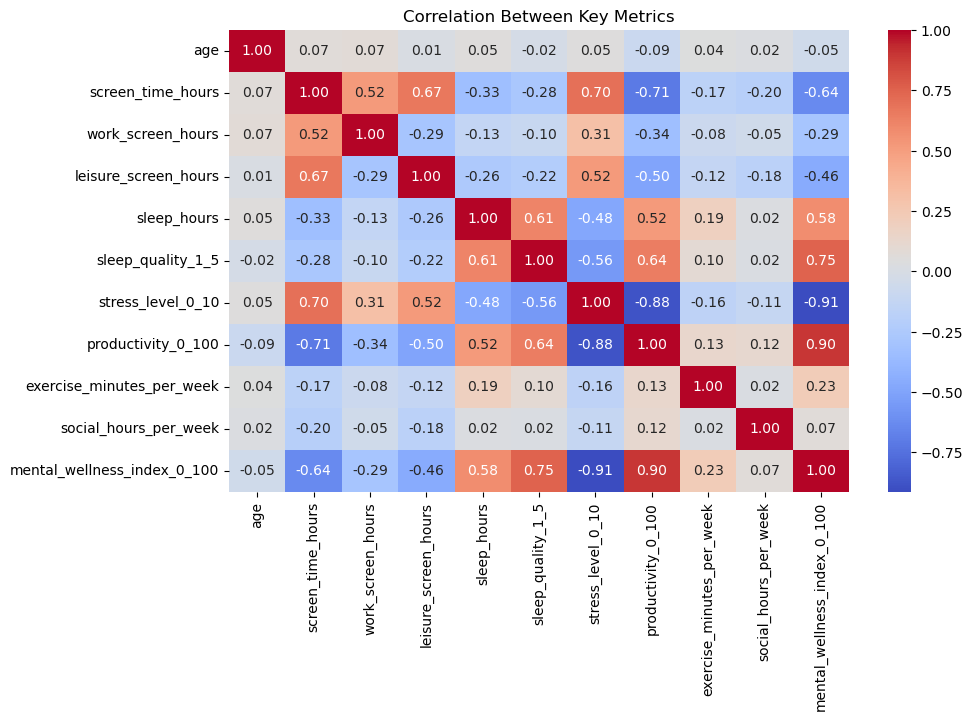

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Key Metrics')
plt.show()


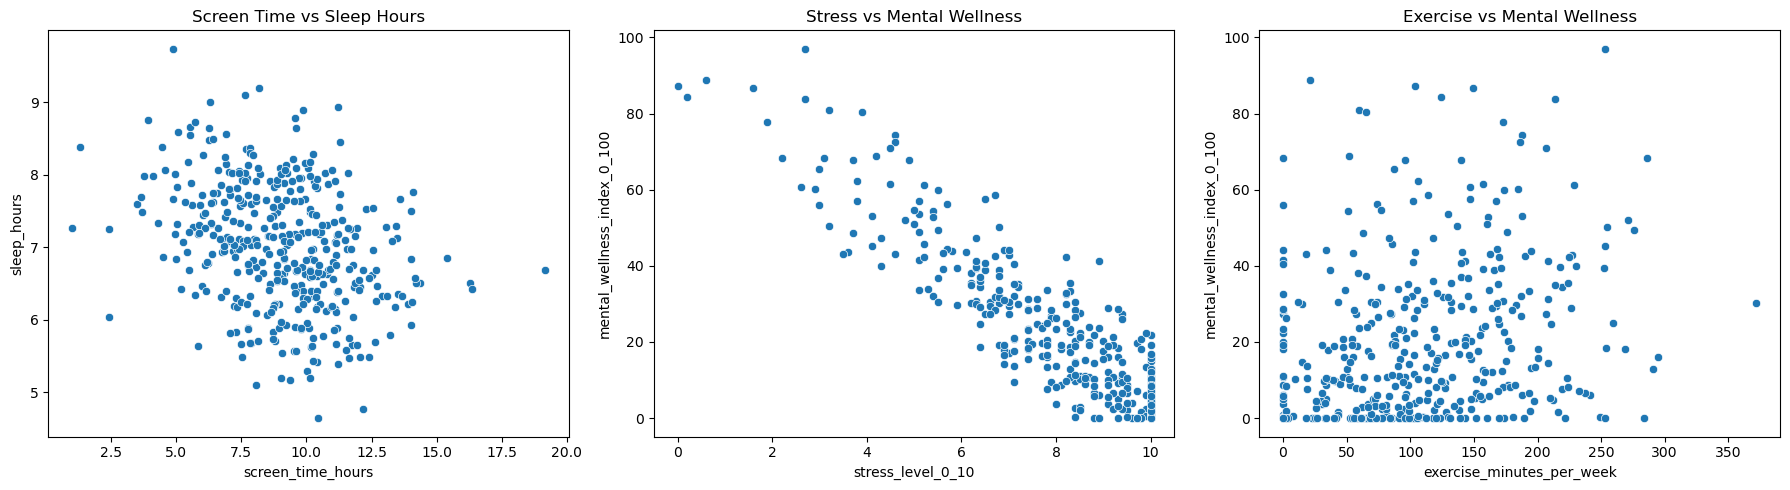

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x='screen_time_hours', y='sleep_hours', data=df, ax=axes[0])
axes[0].set_title('Screen Time vs Sleep Hours')

sns.scatterplot(x='stress_level_0_10', y='mental_wellness_index_0_100', data=df, ax=axes[1])
axes[1].set_title('Stress vs Mental Wellness')

sns.scatterplot(x='exercise_minutes_per_week', y='mental_wellness_index_0_100', data=df, ax=axes[2])
axes[2].set_title('Exercise vs Mental Wellness')

plt.tight_layout()
plt.show()


Model Building

In [14]:
corr_focus = df[['screen_time_hours', 'sleep_hours', 'stress_level_0_10', 
                 'mental_wellness_index_0_100', 'exercise_minutes_per_week']].corr()
corr_focus['mental_wellness_index_0_100']


screen_time_hours             -0.635943
sleep_hours                    0.580824
stress_level_0_10             -0.913818
mental_wellness_index_0_100    1.000000
exercise_minutes_per_week      0.228592
Name: mental_wellness_index_0_100, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['screen_time_hours', 'sleep_hours', 'stress_level_0_10', 'exercise_minutes_per_week']]
y = df['mental_wellness_index_0_100']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model R²:", r2_score(y_test, y_pred))
pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_})


Model R²: 0.8430239943930882


,Feature,Weight
0,screen_time_hours,0.104199
1,sleep_hours,3.651316
2,stress_level_0_10,-8.200955
3,exercise_minutes_per_week,0.021350


Insights and Implications

Stress level (-8.20): every 1-point rise in stress (out of 10) drops wellness by about 8 points — the single most destructive variable.

Sleep hours (+3.65): every extra hour of sleep adds roughly 3.6 wellness points — strong recovery factor.

Screen time (+0.10): tiny positive here, which means after controlling for stress and sleep, screen time alone doesn’t hurt much — the damage happens through stress and poor rest.

Exercise (+0.02): modest but consistent benefit.

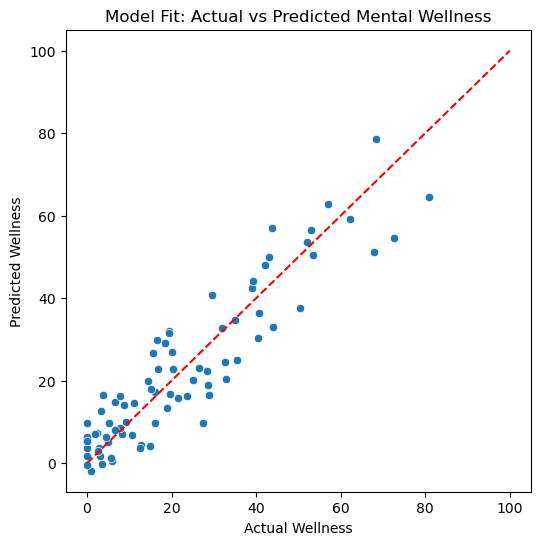

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Wellness')
plt.ylabel('Predicted Wellness')
plt.title('Model Fit: Actual vs Predicted Mental Wellness')
plt.plot([0,100],[0,100],'r--')
plt.show()


Conclusion

FINDINGS 

Stress is the core bottleneck — controlling for everything else, it explains most of the decline in mental wellness. Managing workload, breaks, and mindfulness would yield the biggest wellness gains.

Sleep acts as recovery capital — people sleeping even one hour more trend up by 3–4 wellness points. Sleep quality improvement is nearly as valuable as reducing stress.

Exercise builds resilience — smaller effect, but consistent. It boosts recovery and moderates stress impact.

Screen time isn’t evil itself — once you separate work vs leisure, the harm shows up mainly through stress and lost sleep, not total hours.
